In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 # Step 1: Load the Titanic Dataset
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Data Cleaning
# check missing data
missings = df.isnull().sum().sort_values(ascending = False)
print(missings[missings > 0 ] )

Cabin       687
Age         177
Embarked      2
dtype: int64


In [4]:
# Age: fill with median
df["Age"] = df["Age"].fillna(df["Age"].median())
# Drop Cabin (too many missing)
df = df.drop(columns = "Cabin")

In [5]:
# Fill Embarked with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [6]:
#  Step 3: Feature Engineering
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [7]:
# Convert categorical features:

df = pd.get_dummies(df , columns = ["Sex" , "Embarked"] , drop_first = True)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,True,False,True


In [9]:
# Drop non-useful columns:
df = df.drop(columns=['Name', 'Ticket', 'PassengerId'])  # Optional


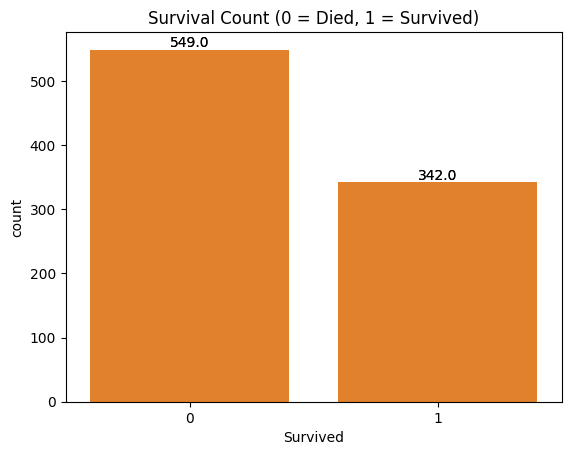

In [10]:
 # Let’s Do EDA & Visualization
# Count of survivors and non-survivors
sns.countplot(x = "Survived" , data = df)
ax = sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()

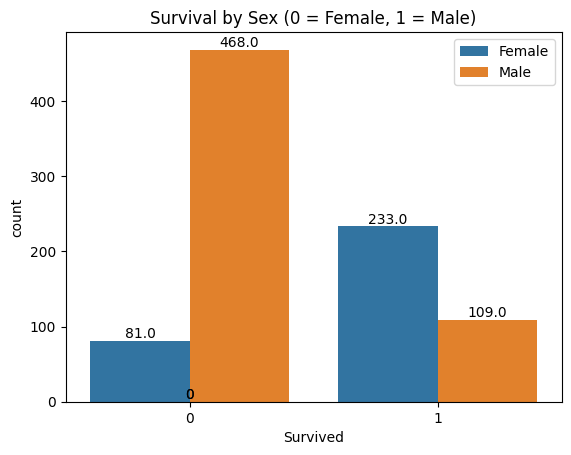

In [11]:
# Survival by Sex
ax = sns.countplot(x='Survived', hue='Sex_male', data=df)
plt.title("Survival by Sex (0 = Female, 1 = Male)")
# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.xlabel("Survived")
plt.legend(labels=['Female', 'Male'])
plt.show()


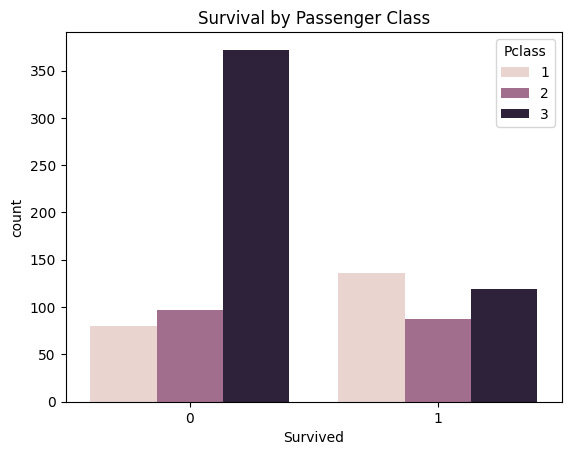

In [12]:
# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Survived")
plt.show()


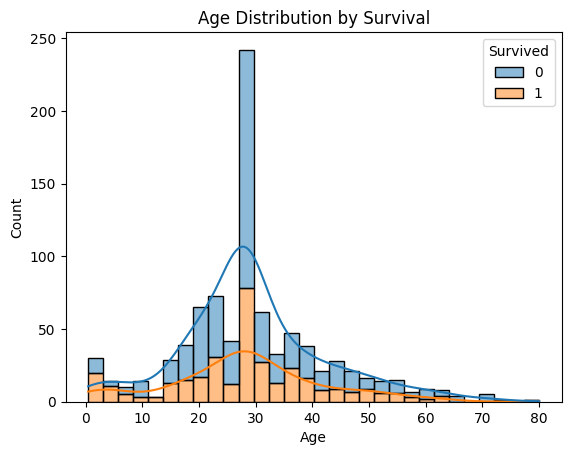

In [13]:
#  Age distribution of survivors
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple="stack")
plt.title("Age Distribution by Survival")
plt.show()


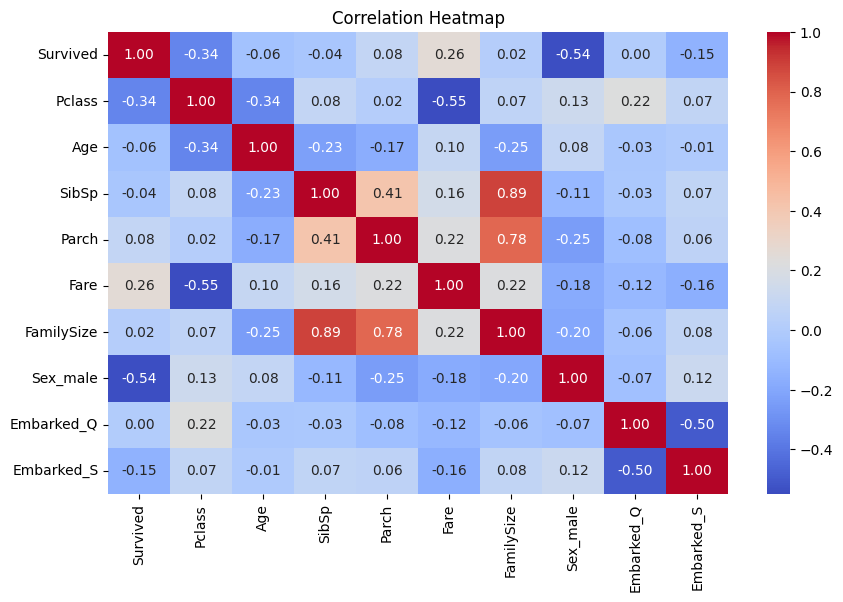

In [14]:
# 5. 📊 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


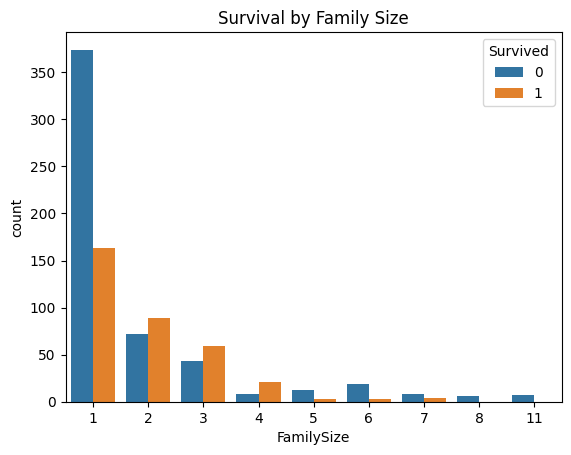

In [15]:
# Optional: Family Size Impac
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()


In [34]:
# Trainging the logistic model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score



In [18]:
# Define features and target
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']


In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Total dataset",X.shape)
print("Training Dateset",X_train.shape)
print("Test Dataset",X_test.shape)

Total dataset (891, 7)
Training Dateset (712, 7)
Test Dataset (179, 7)


In [38]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
y_train_pred = model.predict(X_train)

Training Accuracy: 0.80


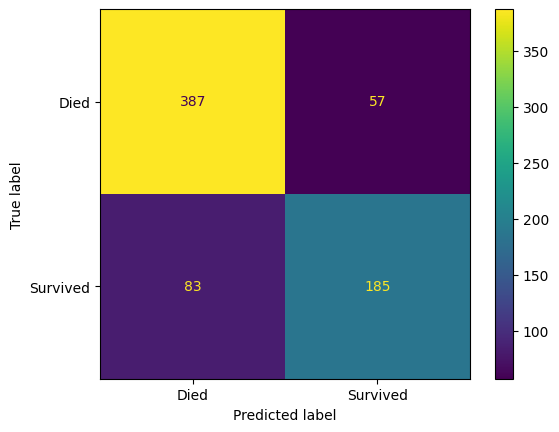

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died", "Survived"])
disp.plot()

# Accuracy Score
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

In [31]:
# evaluate test set
y_test_pred = model.predict(X_test)


Test Accuracy: 0.80


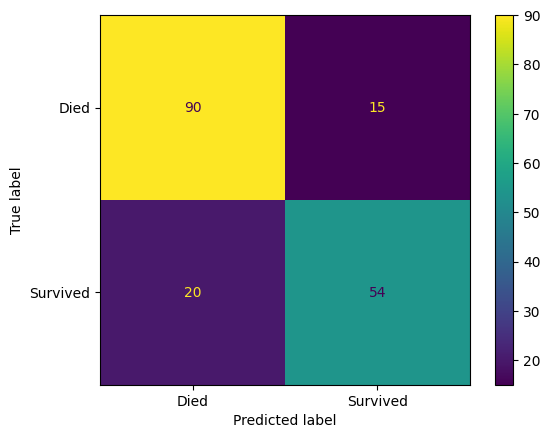

In [32]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Died", "Survived"])
disp.plot()


In [35]:
# # Create the logistic regression model
# model = LogisticRegression(max_iter=1000)

# # Perform 5-fold cross-validation using accuracy
# scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# # Print each fold's result and the average
# print("Cross-validation scores for each fold:", scores)
# print(f"Average CV Accuracy: {np.mean(scores):.2f}")

Cross-validation scores for each fold: [0.77653631 0.79213483 0.79213483 0.78089888 0.82022472]
Average CV Accuracy: 0.79


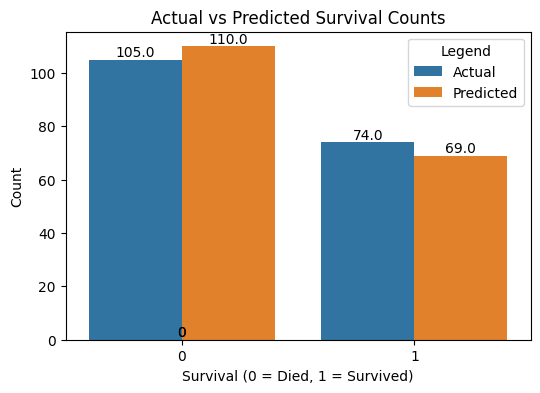

In [44]:
y_test_pred = model.predict(X_test)


# Create a DataFrame for comparison
compare_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Bar plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=compare_df.melt(), x='value', hue='variable')
plt.title("Actual vs Predicted Survival Counts")
plt.xlabel("Survival (0 = Died, 1 = Survived)")
# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.ylabel("Count")
plt.legend(title="Legend")
plt.show()


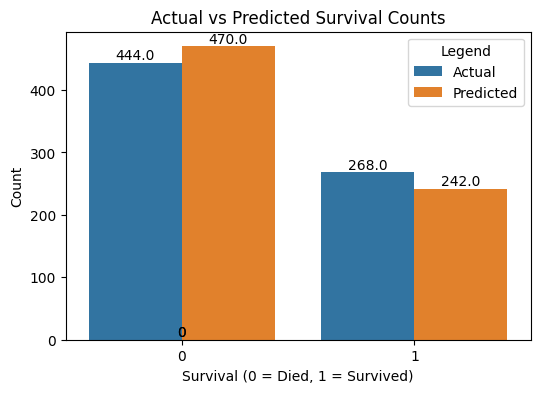

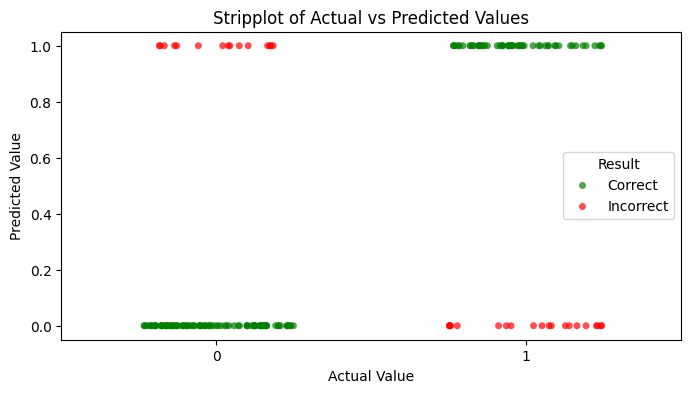

In [51]:
# Stripplot: See Prediction Errors
# This helps show where mismatches happen.
 # Add a column: Correct or Incorrect
compare_df['Result'] = compare_df['Actual'] == compare_df['Predicted']
compare_df['Result'] = compare_df['Result'].map({True: 'Correct', False: 'Incorrect'})
plt.figure(figsize=(8, 4))
# sns.stripplot(x='Actual', y='Predicted', data=compare_df, jitter=0.25, alpha=0.6)
sns.stripplot(data=compare_df, x='Actual', y='Predicted', hue='Result', jitter=0.25, alpha=0.7, palette={'Correct': 'green', 'Incorrect': 'red'})
plt.title("Stripplot of Actual vs Predicted Values")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()


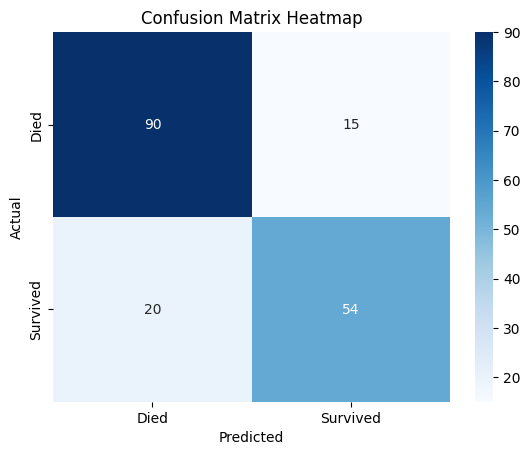

In [46]:
# Confusion Matrix Heatmap (visually clearer)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


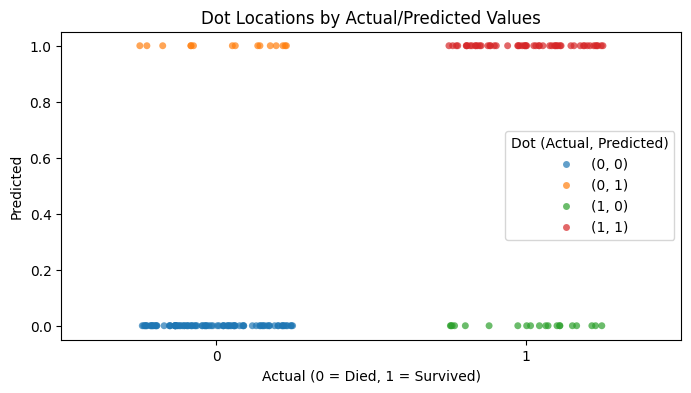

In [48]:
compare_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Add label for type of prediction
compare_df['Type'] = compare_df.apply(
    lambda row: f"({row.Actual}, {row.Predicted})", axis=1
)
plt.figure(figsize=(8, 4))
sns.stripplot(data=compare_df, x='Actual', y='Predicted', hue='Type', jitter=0.25, alpha=0.7)

plt.title("Dot Locations by Actual/Predicted Values")
plt.xlabel("Actual (0 = Died, 1 = Survived)")
plt.ylabel("Predicted")
plt.legend(title="Dot (Actual, Predicted)")
plt.show()

In [57]:
 # Full Manual Implementation in Python
 # 1. Helper Functions
# Sigmoid activation
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Binary cross-entropy loss
def compute_loss(y , y_hat):
    m = y.shape[0]
    return -1/m * np.sum(y*np.log(y_hat + 1e-9) + (1 - y)*np.log(1 - y_hat + 1e-9))


In [53]:
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0

    losses = []

    for i in range(epochs):
        # Forward pass
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)

        # Compute loss
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        # Gradients
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        # Update weights
        w -= lr * dw
        b -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return w, b, losses


In [55]:
def predict(X, w, b, threshold=0.5):
    probs = sigmoid(np.dot(X, w) + b)
    return (probs >= threshold).astype(int)


In [81]:
 # Normalize Features Properly
# Make sure all numeric features (like Age, Fare) are scaled:
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Ensure inputs are numpy arrays with float type
X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)
y_test = np.array(y_test, dtype=np.float64)
# Make sure y is a column vector (m x 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# Train manually
w, b, losses = train_logistic_regression(X_train, y_train, lr=0.1, epochs=1000)

# Predict
y_pred = predict(X_test, w, b)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Manual Logistic Regression Accuracy: {accuracy:.2f}")


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.4603
Epoch 200: Loss = 0.4509
Epoch 300: Loss = 0.4493
Epoch 400: Loss = 0.4489
Epoch 500: Loss = 0.4488
Epoch 600: Loss = 0.4488
Epoch 700: Loss = 0.4487
Epoch 800: Loss = 0.4487
Epoch 900: Loss = 0.4487
Manual Logistic Regression Accuracy: 0.80


In [82]:
# Predict on training set
y_train_pred = predict(X_train, w, b)

# Predict on test set
y_test_pred = predict(X_test, w, b)

In [83]:
 # Calculate Accuracy
# Accuracy is just the percentage of correct predictions
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.80
Test Accuracy: 0.80


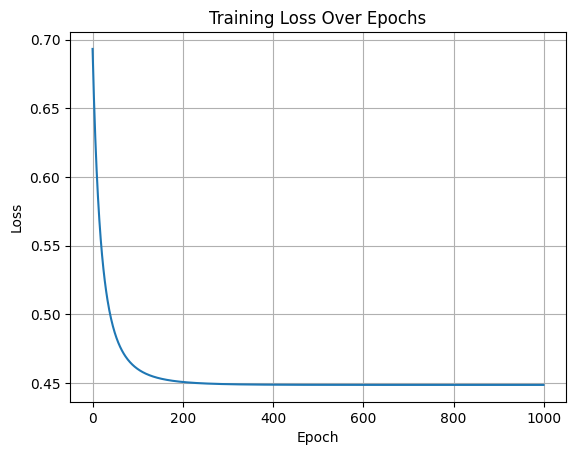

In [84]:
 # Plot Training Loss (for learning curve)
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [85]:
# Evaluate with more metrics:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       105
         1.0       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



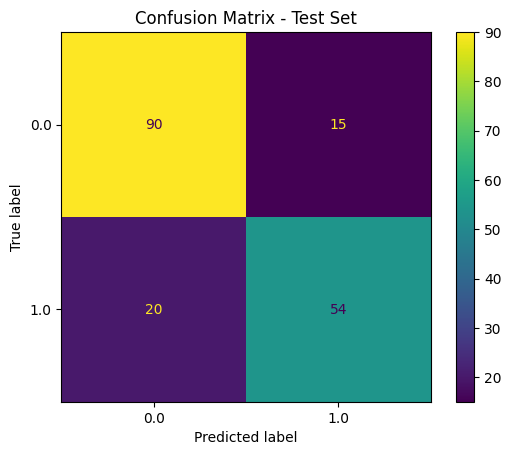

In [86]:
# Visualize confusion matrix:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Confusion Matrix - Test Set")
plt.show()